## Generowanie zbioru danych

Wygenerujemy **koła olimpijskie**. Testowanie algorytmów **PAM** oraz **K-Means** na tym zbiorze danych pozwoli nam uwypuklić różnicę w ich działaniu. 

W tym celu tworzymy sobie funkcję tworzącą okrąg, a następnie tworzymy sobie za jej pomocą koła w odpowiednich miejscach, odległościach i o właścich kolorach.

### Co się stanie?

- **K-Means** będzie potrafił znaleźć jako środki klastrów **środki tych okręgów**.
- Algorytm **PAM** natomiast będzie musiał uznać swoją mierność wobec tego problemu, gdyż on za środki klastrów bierze jedynie punkty ze zbioru danych, a tych jak świetnie się orientujemy w środku kół olimpijskich jest jak na lekarstwo.

Algorytm PAM został dopiero co zaimplementowany, jest jeszcze młody i musi się sporo nauczyć. Myślę, że taki zimny prysznic w postaci porażki w rywalizacji z algorytmem K-Means pozwoli mu wynieść cenną lekcję i w przyszłości wobec ewentualnych sukcesów w zbiorach z outlierami zachować pokorę, która jak wiemy w ujęciu humanistycznym jest jakby stanem ducha, postawą życiową wyrażającą przekonanie na temat otaczającego nas świata, jak również ogółu istot go zamieszkujących.

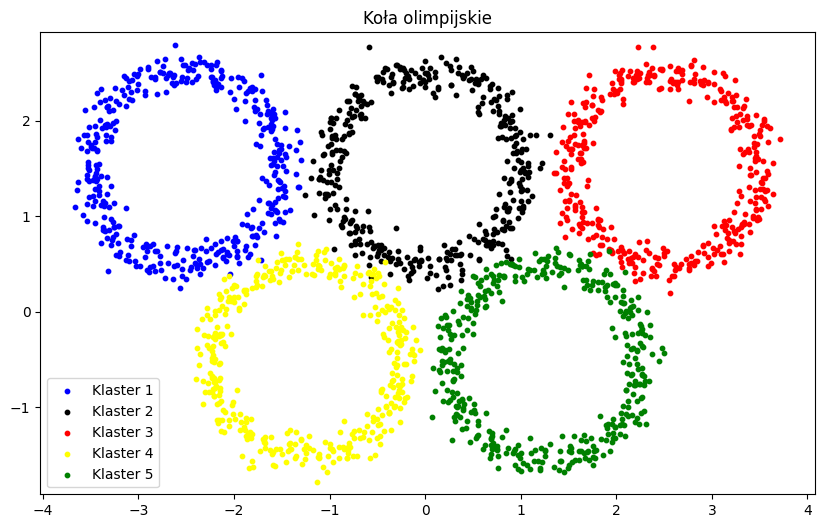

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_circle(center, radius, num_points, noise=0.1):
    """
    Funkcja generuje punkty w kształcie koła z zadaną liczbą punktów, promieniem i centrum.
    """
    angles = np.linspace(0, 2 * np.pi, num_points)
    x = center[0] + radius * np.cos(angles) + np.random.normal(0, noise, num_points)
    y = center[1] + radius * np.sin(angles) + np.random.normal(0, noise, num_points)
    return np.column_stack((x, y))

# Określamy sobie środki, promienie i kolory kół olimpijskich.
centers = [
    (-2.5, 1.5), (0, 1.5), (2.5, 1.5),  # Górne trzy koła
    (-1.25, -0.5), (1.25, -0.5)         # Dolne dwa koła
]
colors = ["blue", "black", "red", "yellow", "green"]  # Kolory olimpijskie
radius = 1  # Promień każdego koła
num_points = 400  # Liczba punktów na każde koło
noise = 0.1  # Dodany szum żeby nie były to idealne koła

# Generowanie danych dla każdego koła
data = []
labels = []
for i, center in enumerate(centers):
    circle = generate_circle(center, radius, num_points, noise)
    data.append(circle)
    labels.extend([i] * num_points)

# Zamieniamy na numpy array
data = np.vstack(data)
labels = np.array(labels)

# Wizualizacja danych
plt.figure(figsize=(10, 6))
for i, color in enumerate(colors):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], color=color, label=f"Klaster {i+1}", s=10)
plt.title("Koła olimpijskie")
plt.legend()
plt.axis("equal")
plt.show()

Zapisanie pliku do csv

In [ ]:
import pandas as pd
df = pd.DataFrame(data, columns=["X1", "X2"])
df['y'] = labels
df = df[['y', 'X1', 'X2']]
df.to_csv("327205_data.csv", index=False)

In [4]:
# To się nam przyda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from Algorytm_PAM import cluster_PAM
from sklearn.cluster import KMeans

X = pd.read_csv("X.csv")
y = pd.read_csv("y.csv")
X = X.to_numpy()

# Wizualizacja podstawowego zbioru danych

<Axes: >

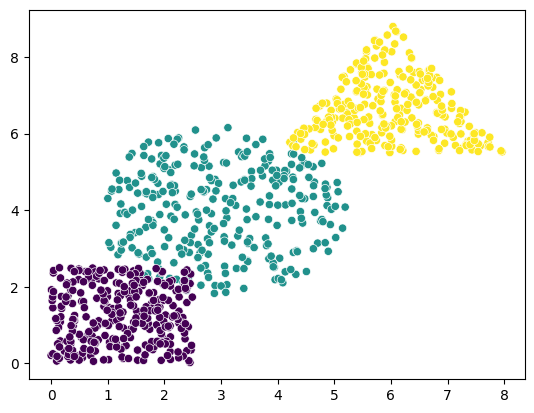

In [5]:
# Tworzymy obiekt LabelEncoder i zamieniamy etykiety na liczby
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y.to_numpy().reshape(-1))

sns.scatterplot(x = X[:, 0], y = X[:, 1], c = y_encoded)

# Pierwsze testy obu algorytmów

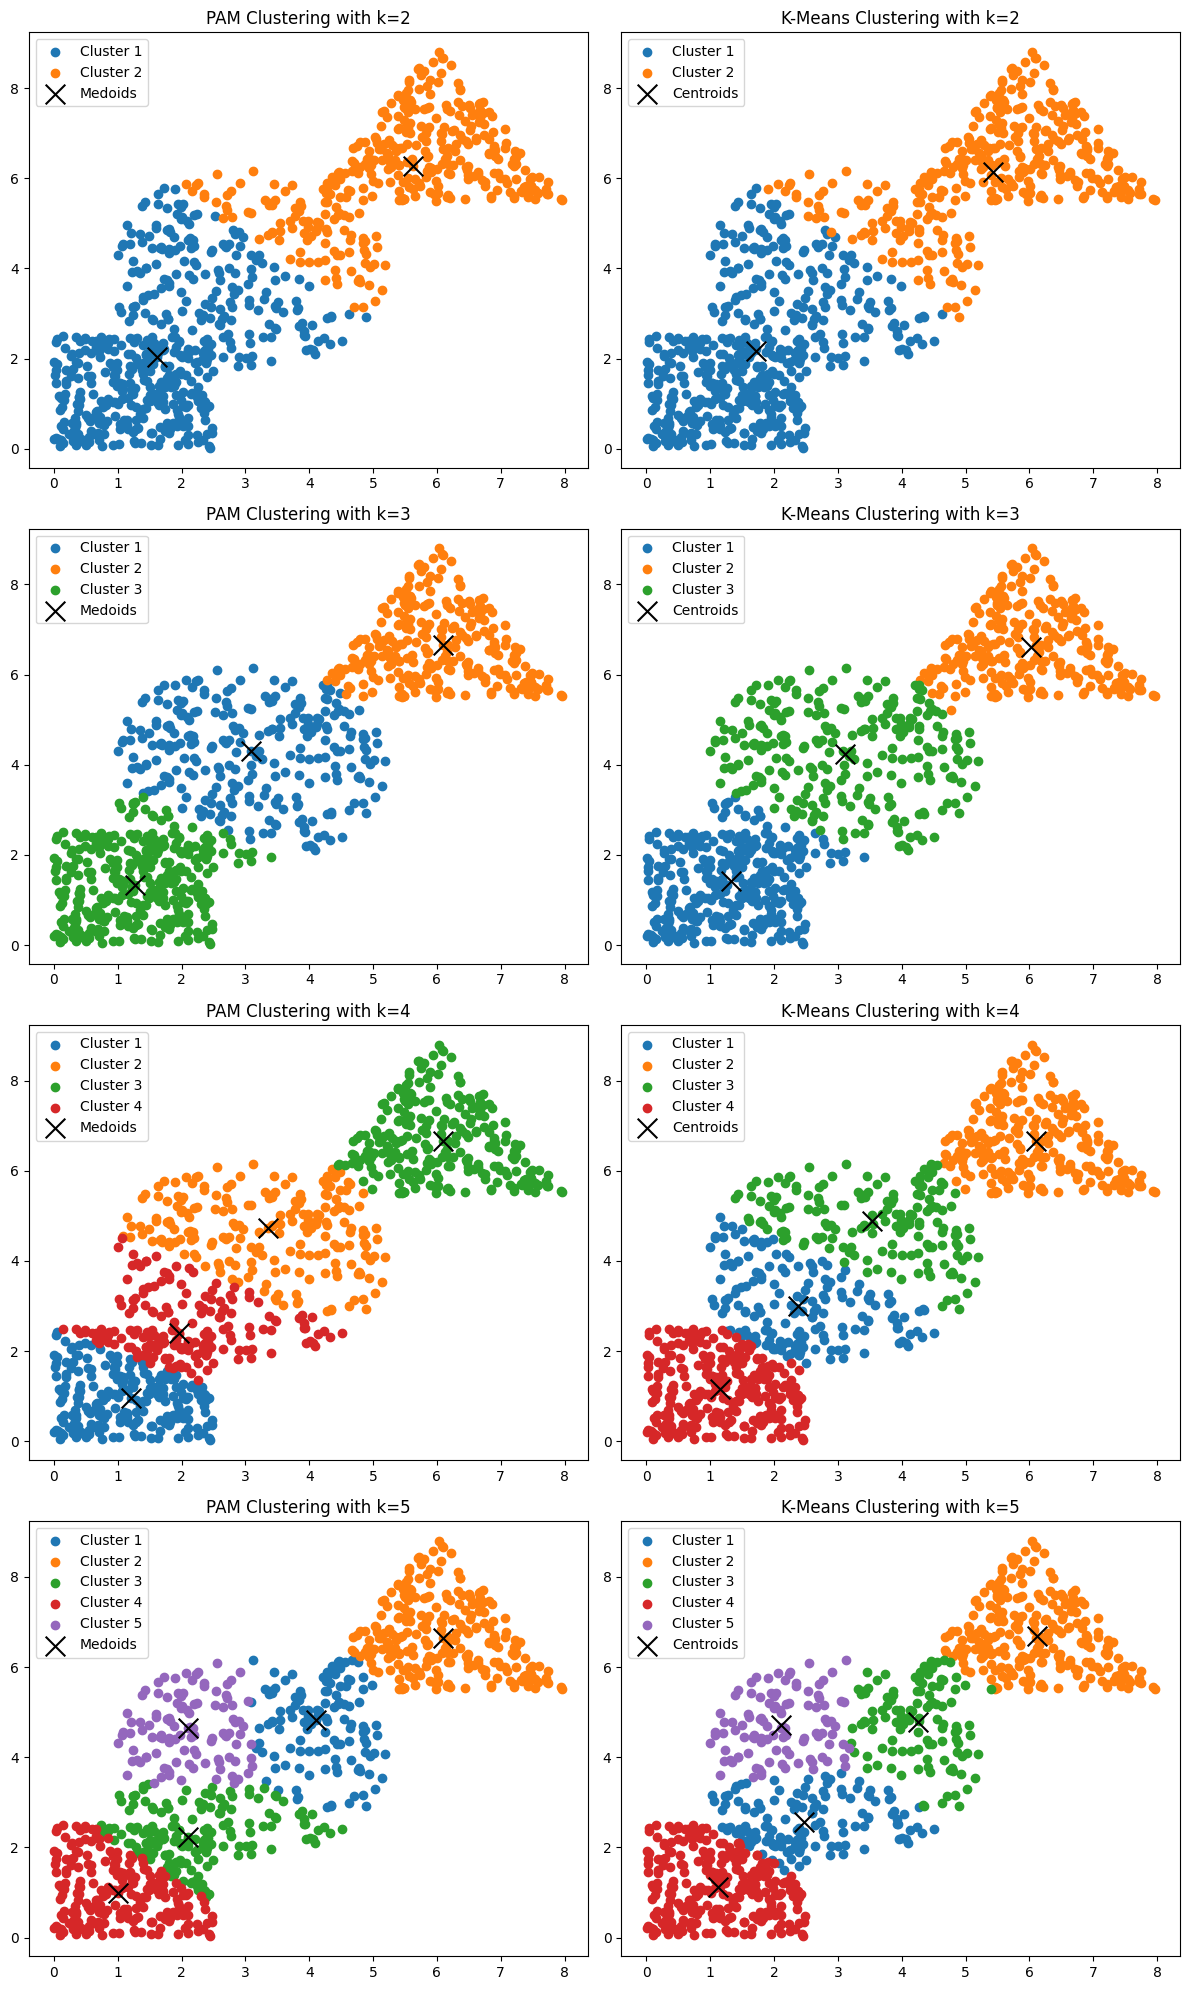

In [6]:
k_values = [2, 3, 4, 5]  # Liczba klastrów do porównania

fig, axes = plt.subplots(4, 2, figsize=(12, 20))

# Kolumny: 0 - PAM, 1 - KMeans
for i, k in enumerate(k_values):
    # --- PAM ---
    ax_pam = axes[i, 0]
    medoids, clusters, _ = cluster_PAM(X, k)
    for cluster_id in range(k):
        cluster_points = X[clusters == cluster_id]
        ax_pam.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}")
    ax_pam.scatter(X[medoids, 0], X[medoids, 1], color='black', s=200, marker='x', label='Medoids')
    ax_pam.set_title(f"PAM Clustering with k={k}")
    ax_pam.legend()

    # --- KMeans ---
    ax_kmeans = axes[i, 1]
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    for cluster_id in range(k):
        cluster_points = X[clusters == cluster_id]
        ax_kmeans.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}")
    
    ax_kmeans.scatter(centroids[:, 0], centroids[:, 1], color='black', s=200, marker='x', label='Centroids')
    ax_kmeans.set_title(f"K-Means Clustering with k={k}")
    ax_kmeans.legend()

plt.tight_layout()
plt.show()

Widzimy, że na pierwszym zbiorze oba algorytmy zachowały się dosyć podobnie. Jedynie przy 5 klastrach zauważamy inne koncepcje w grupowaniu. Moim zdaniem w tym przypadku większy sens ma rozwiązanie zaproponowane przez algorytm KMeans.

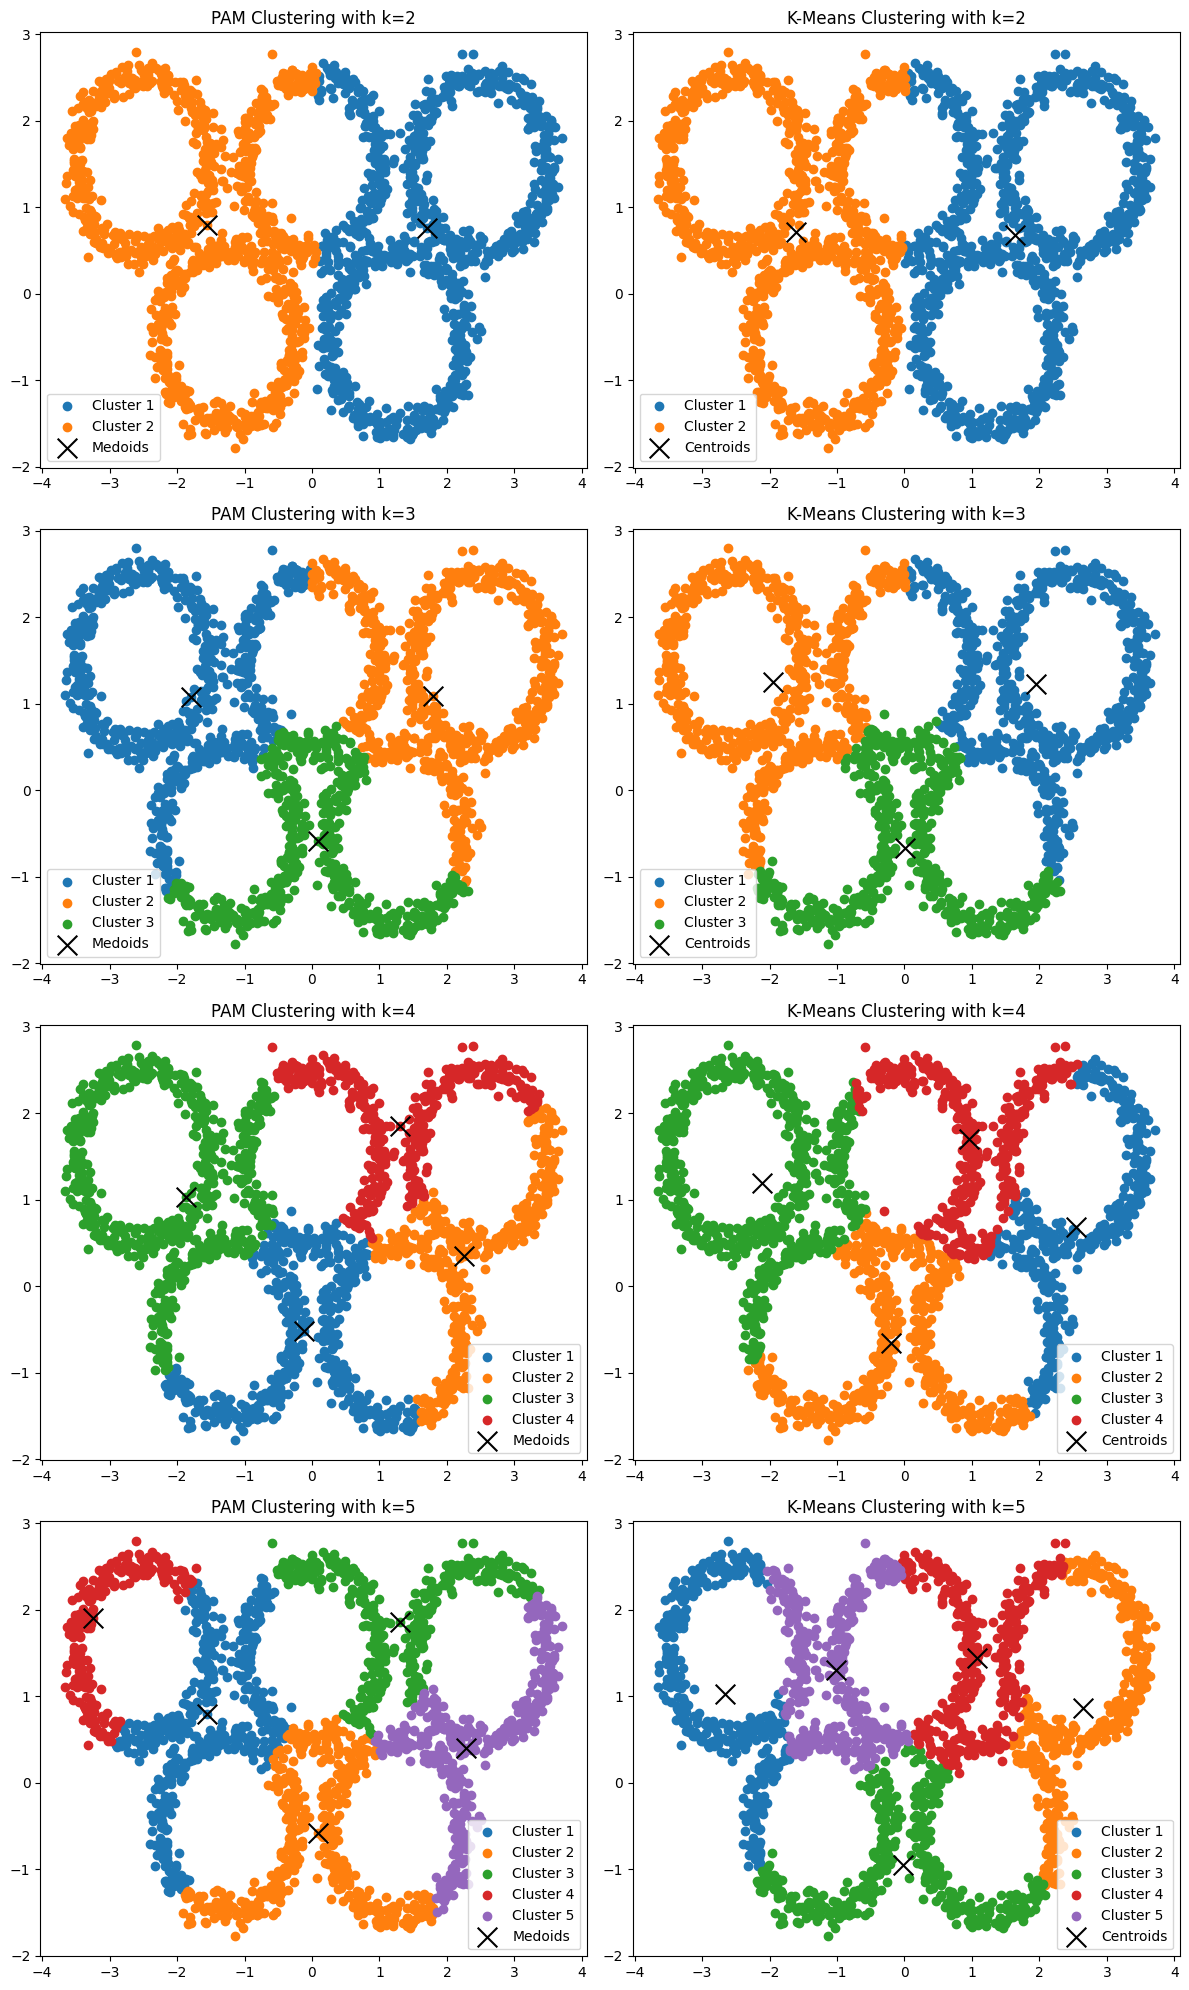

In [7]:
k_values = [2, 3, 4, 5]  # Liczba klastrów do porównania

fig, axes = plt.subplots(4, 2, figsize=(12, 20))

# Kolumny: 0 - PAM, 1 - KMeans
for i, k in enumerate(k_values):
    # --- PAM ---
    ax_pam = axes[i, 0]
    medoids, clusters, _ = cluster_PAM(data, k)
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        ax_pam.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}")
    ax_pam.scatter(data[medoids, 0], data[medoids, 1], color='black', s=200, marker='x', label='Medoids')
    ax_pam.set_title(f"PAM Clustering with k={k}")
    ax_pam.legend()

    # --- KMeans ---
    ax_kmeans = axes[i, 1]
    kmeans = KMeans(n_clusters=k, n_init = 1)
    kmeans.fit(data)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        ax_kmeans.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}")
    
    ax_kmeans.scatter(centroids[:, 0], centroids[:, 1], color='black', s=200, marker='x', label='Centroids')
    ax_kmeans.set_title(f"K-Means Clustering with k={k}")
    ax_kmeans.legend()

plt.tight_layout()
plt.show()

Przy drugim zbiorze danych świetnie widać, że te algorytmy się różnią. Najbardziej rzuca się w oczy umiejscowienie czarnych krzyżyków, a więc odpowiednio środków w KMeans oraz medoidów w PAM. 

Powiedzmy coś więcej o 5 klastrach, co było tutaj naturalnym wyborem ilości zgrupowań. Jak wspomnieliśmy wcześniej PAM przez swoją naturę nie miał szans poradzić sobie z rozpoznaniem kół, a KMeans sobie poradził. 

Jako ciekawostkę warto dodać, że na 100 prób algorytmu KMeans w rozpoznawaniu pięciu kółek aż 40 z nich zakończyło się sukcesem, a kolejna duża część była bliska ideału. Co jeszcze ciekawsze w tym przypadku idealne rozpoznanie kół nie było rozwiązaniem optymalnym pod względem SSE.

# Porównanie czasów

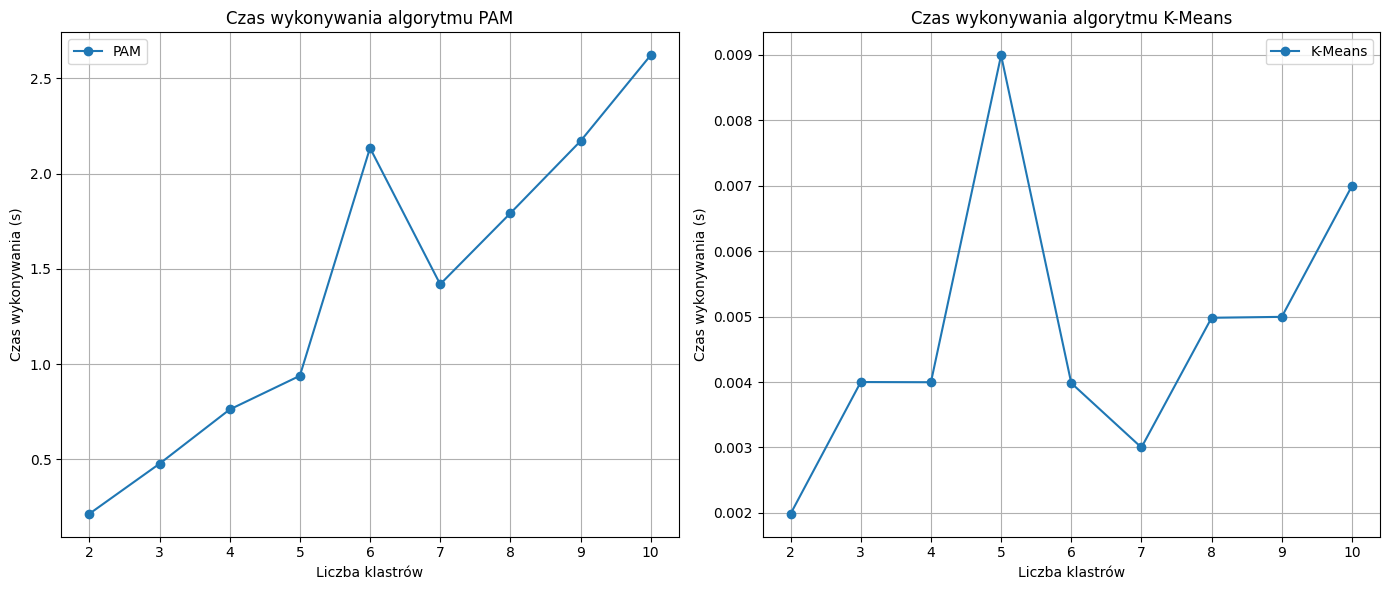

In [8]:
pam_times = []
kmeans_times = []

# Porównanie czasu dla różnych wartości k
for k in range(2, 11):
    # PAM
    start_time = time.time()
    cluster_PAM(X, k)
    pam_times.append(time.time() - start_time)
    
    # KMeans
    start_time = time.time()
    kmeans = KMeans(n_clusters=k, n_init=1).fit(X)
    kmeans_times.append(time.time() - start_time)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PAM wykres
axes[0].plot(range(2, 11), pam_times, label="PAM", marker='o')
axes[0].set_xlabel("Liczba klastrów")
axes[0].set_ylabel("Czas wykonywania (s)")
axes[0].set_title("Czas wykonywania algorytmu PAM")
axes[0].grid()
axes[0].legend()

# K-Means wykres
axes[1].plot(range(2, 11), kmeans_times, label="K-Means", marker='o')
axes[1].set_xlabel("Liczba klastrów")
axes[1].set_ylabel("Czas wykonywania (s)")
axes[1].set_title("Czas wykonywania algorytmu K-Means")
axes[1].grid()
axes[1].legend()

plt.tight_layout()
plt.show()

Jeśli chodzi o czas, to jest przepaść. Pamiętajmy jednak, że nasza implementacja algorytmu PAM nie jest wyjątkowo zoptymalizowana. Można by coś pokombinować na przykład z bardziej wyszukanym wybieraniem początkowych medoidów. 

To, co jednak zasługuje na uwagę, to że algorytm PAM wydaje się być mniej odporny na większą liczbę klastrów. Czas zdaje się być bardzo skorelowany z ilością grup, na które chcemy podzielić zbiór danych. Przy KMeans również można się doszukać tej zależności, ale jest ona mniej drastyczna (patrząc na wartości na osi y). 

Być może przy bardziej optymalnym algorytmie PAM wszystko by się wyrównało.

# Szukanie optymalnego parametru k

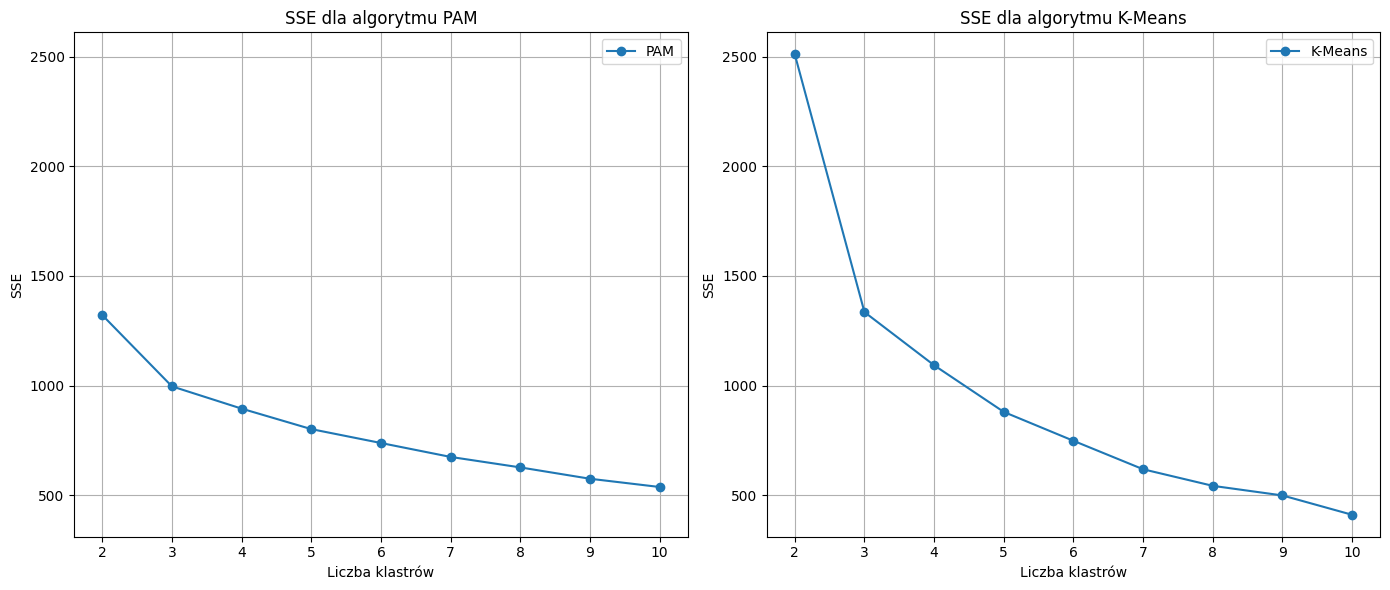

In [9]:
pam_sse = []
kmeans_sse = []

# Porównanie SSE dla różnych wartości k
for k in range(2, 11):
    # PAM
    _, _, pam_cost = cluster_PAM(X, k)
    pam_sse.append(pam_cost)
    
    # KMeans
    kmeans = KMeans(n_clusters=k, n_init=1).fit(X)
    kmeans_sse.append(kmeans.inertia_)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PAM wykres
axes[0].plot(range(2, 11), pam_sse, label="PAM", marker='o')
axes[0].set_xlabel("Liczba klastrów")
axes[0].set_ylabel("SSE")
axes[0].set_title("SSE dla algorytmu PAM")
axes[0].grid()
axes[0].legend()

# K-Means wykres
axes[1].plot(range(2, 11), kmeans_sse, label="K-Means", marker='o')
axes[1].set_xlabel("Liczba klastrów")
axes[1].set_ylabel("SSE")
axes[1].set_title("SSE dla algorytmu K-Means")
axes[1].grid()
axes[1].legend()

# żeby była taka sama oś y
y_min = min(min(pam_sse), min(kmeans_sse))
y_max = max(max(pam_sse), max(kmeans_sse))
axes[0].set_ylim(y_min-100, y_max+100)
axes[1].set_ylim(y_min-100, y_max+100)

plt.tight_layout()
plt.show()

W pierwszym zbiorze danych jeśli miałbym wybrać optymalne k, to stosując PAM wybrałbym może od 3 do 5 klastrów. Natomiast przy algorytmie KMeans być może pokusiłbym się nawet o 6 klastrów.

Mając jednak na uwadze, że dane mają naturalną postać w formie 3 klastrów, można by doszukiwać się na wykresach bardzo wcześnie, bo już przy trójce, zgiętego łokcia i wybrać właśnie wedle tej popularnej metody wspomniane trzy klastry.

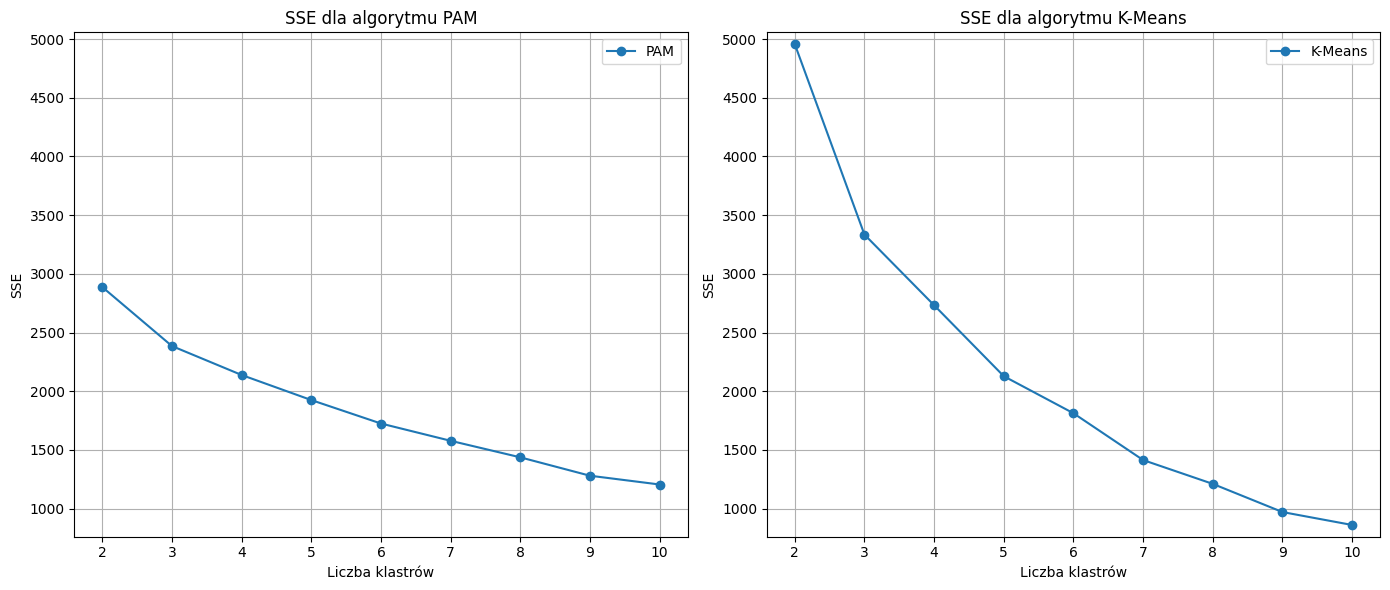

In [10]:
pam_sse = []
kmeans_sse = []

# Porównanie SSE dla różnych wartości k
for k in range(2, 11):
    # PAM
    _, _, pam_cost = cluster_PAM(data, k)
    pam_sse.append(pam_cost)
    
    # KMeans
    kmeans = KMeans(n_clusters=k, n_init=1).fit(data)
    kmeans_sse.append(kmeans.inertia_)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PAM wykres
axes[0].plot(range(2, 11), pam_sse, label="PAM", marker='o')
axes[0].set_xlabel("Liczba klastrów")
axes[0].set_ylabel("SSE")
axes[0].set_title("SSE dla algorytmu PAM")
axes[0].grid()
axes[0].legend()

# K-Means wykres
axes[1].plot(range(2, 11), kmeans_sse, label="K-Means", marker='o')
axes[1].set_xlabel("Liczba klastrów")
axes[1].set_ylabel("SSE")
axes[1].set_title("SSE dla algorytmu K-Means")
axes[1].grid()
axes[1].legend()

# żeby była taka sama oś y
y_min = min(min(pam_sse), min(kmeans_sse))
y_max = max(max(pam_sse), max(kmeans_sse))
axes[0].set_ylim(y_min-100, y_max+100)
axes[1].set_ylim(y_min-100, y_max+100)

plt.tight_layout()
plt.show()

W drugim zbiorze danych widzimy, że mamy trochę inne zachowanie krzywych. Algorytmy początkowo wolniej zmniejszają koszt. Odbywa się to w bardziej liniowy sposób. Ciężko wybrać ilość klastrów na podstawie tego wykresu. Myślę, że każda liczba klastrów większa od 4 byłaby bardzo rozsądna. Podsumowująć wybór zależy od naszych oczekiwań, przyszłych zastosowań oraz potrzeb.

Ogólnie uwagę zwraca fakt, że KMeans wolniej redukuje SSE. Potem jednak przegania PAM i przy większej ilości klastrów okazuje się lepszy w tej metryce. 

Można by to metaforycznie porównać do siania zboża. Pierwsze zboże szybko dojrzewa i szybciej możemy zbierać plony. Drugie zboże najpierw potrzebuje dużo czasu rozwijać się w ziemi, aby na koniec pięknie zakwitnąć. Jednakże zboże, które zakwitło dopiero w porze jesiennej, jest trudniej zebrać przez deszcze i gorszą pogodę. Tak samo bycie lepszym przy 10 klastrach podobnie może nie być optymalnym rozwiązaniem, gdyż często będziemy potrzebowali plonów, tudzież dobrego SSE, już przy 4 klastrach. Stąd algorytm PAM dla tych danych pod tym względem zyskuje punkt.